In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv") 
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [58]:
data.shape

(31647, 18)

##### dataset is related to BANK MARKETING whether the customer has a fixed deposit or not.

###### The Data set has 31647 rows and 18 columns.

In [59]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [60]:
data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


##### Here no null value is present and some data types are int64 and some data types are object.

In [62]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'------------------', unique_count)

Column: ID ------------------ 31647
Column: age ------------------ 76
Column: job ------------------ 12
Column: marital ------------------ 3
Column: education ------------------ 4
Column: default ------------------ 2
Column: balance ------------------ 6326
Column: housing ------------------ 2
Column: loan ------------------ 2
Column: contact ------------------ 3
Column: day ------------------ 31
Column: month ------------------ 12
Column: duration ------------------ 1454
Column: campaign ------------------ 45
Column: pdays ------------------ 509
Column: previous ------------------ 38
Column: poutcome ------------------ 4
Column: subscribed ------------------ 2


###### Only ID, balances, duration, pdays have continuous data.  all othere contain categorical data.

In [63]:
data["age"].value_counts()

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

##### people between 30 and 50 are the most numberous. 60 to 100 very less and 10 to 20 also very less


In [64]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])
    
print(data.head())


      ID  age   job  marital  education  default  balance  housing  loan  \
0  26110   56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1  40576   31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2  15320   27   7.0      1.0        1.0      0.0      891      1.0   0.0   
3  43962   57   4.0      0.0        2.0      0.0     3287      0.0   0.0   
4  29842   31   9.0      1.0        1.0      0.0      119      1.0   0.0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  \
0      1.0   19    9.0        44         2     -1         0       3.0   
1      0.0   20    5.0        91         2     -1         0       3.0   
2      0.0   18    5.0       240         1     -1         0       3.0   
3      0.0   22    6.0       867         1     84         3       2.0   
4      0.0    4    3.0       380         1     -1         0       3.0   

   subscribed  
0         0.0  
1         0.0  
2         0.0  
3         1.0  
4         0.0  


In [65]:
data.dtypes

ID              int64
age             int64
job           float64
marital       float64
education     float64
default       float64
balance         int64
housing       float64
loan          float64
contact       float64
day             int64
month         float64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
subscribed    float64
dtype: object

In [66]:
data.drop('ID',axis=1, inplace=True)

In [67]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


##### I noticed a lot of skewness and outliers in the balance column.duration and pdays also have skewness and outliers. All others contain categorical data.

<AxesSubplot:>

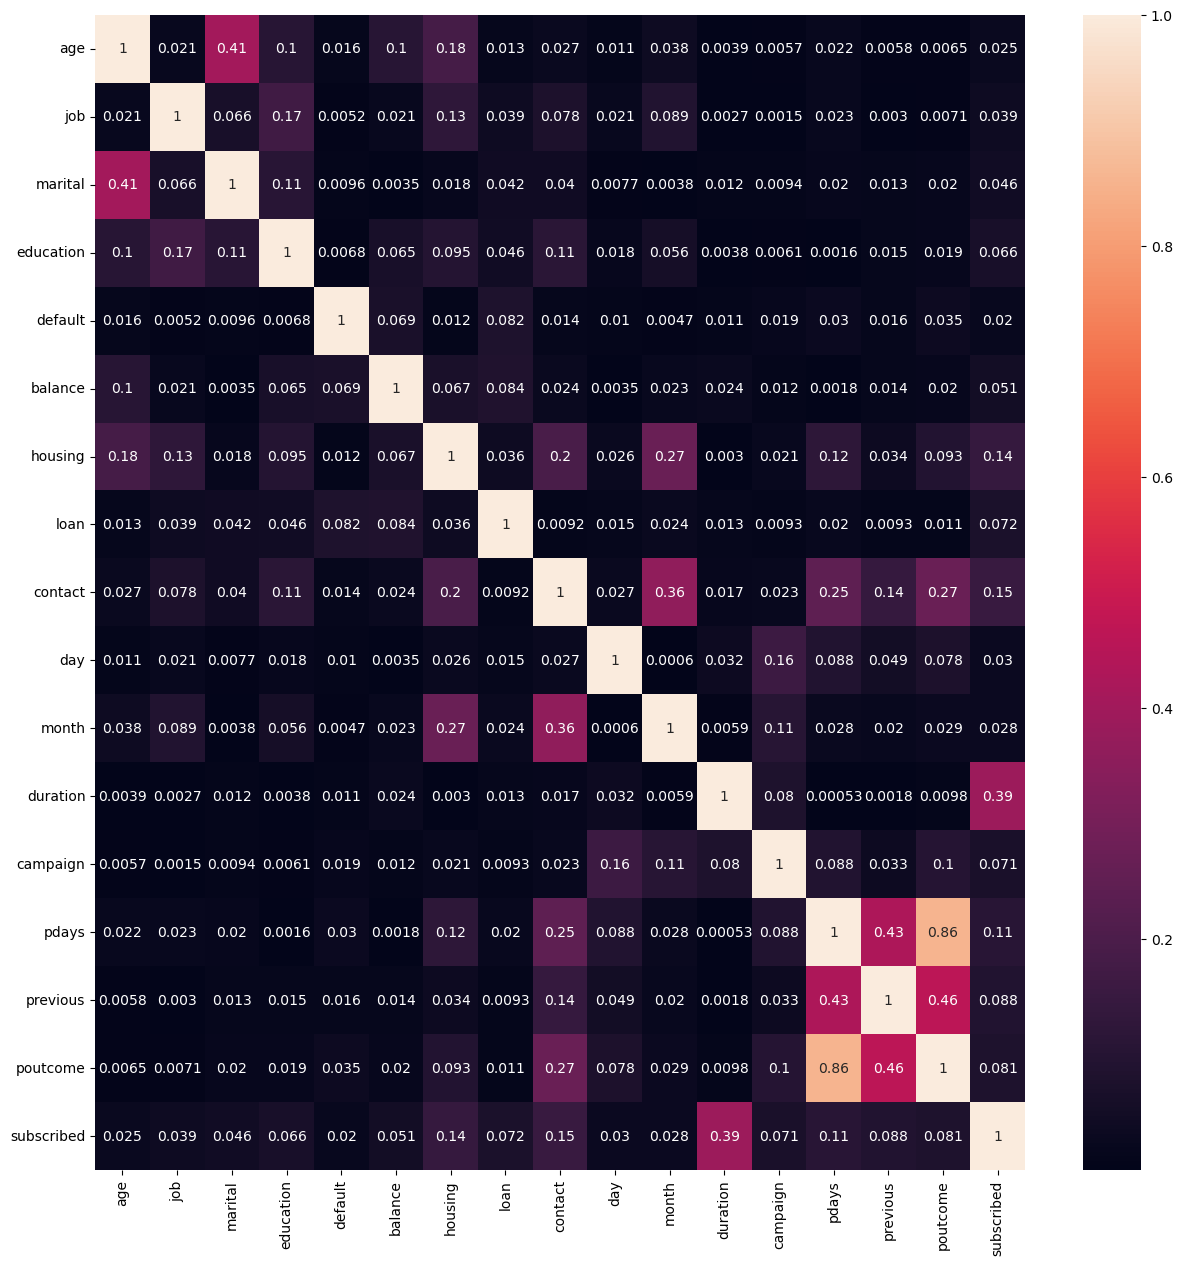

In [68]:
#Let's check correlation and multicollinerity
plt.figure(figsize=(15,15))

sns.heatmap(data.corr().abs(), annot=True)

##### There is multicollinearity issue only within pdays and poutcome. Features have medium correlation with lable.
##### Poutcome has very less correlation with lable so we will delete it.

In [69]:
data.drop('poutcome',axis=1, inplace=True)

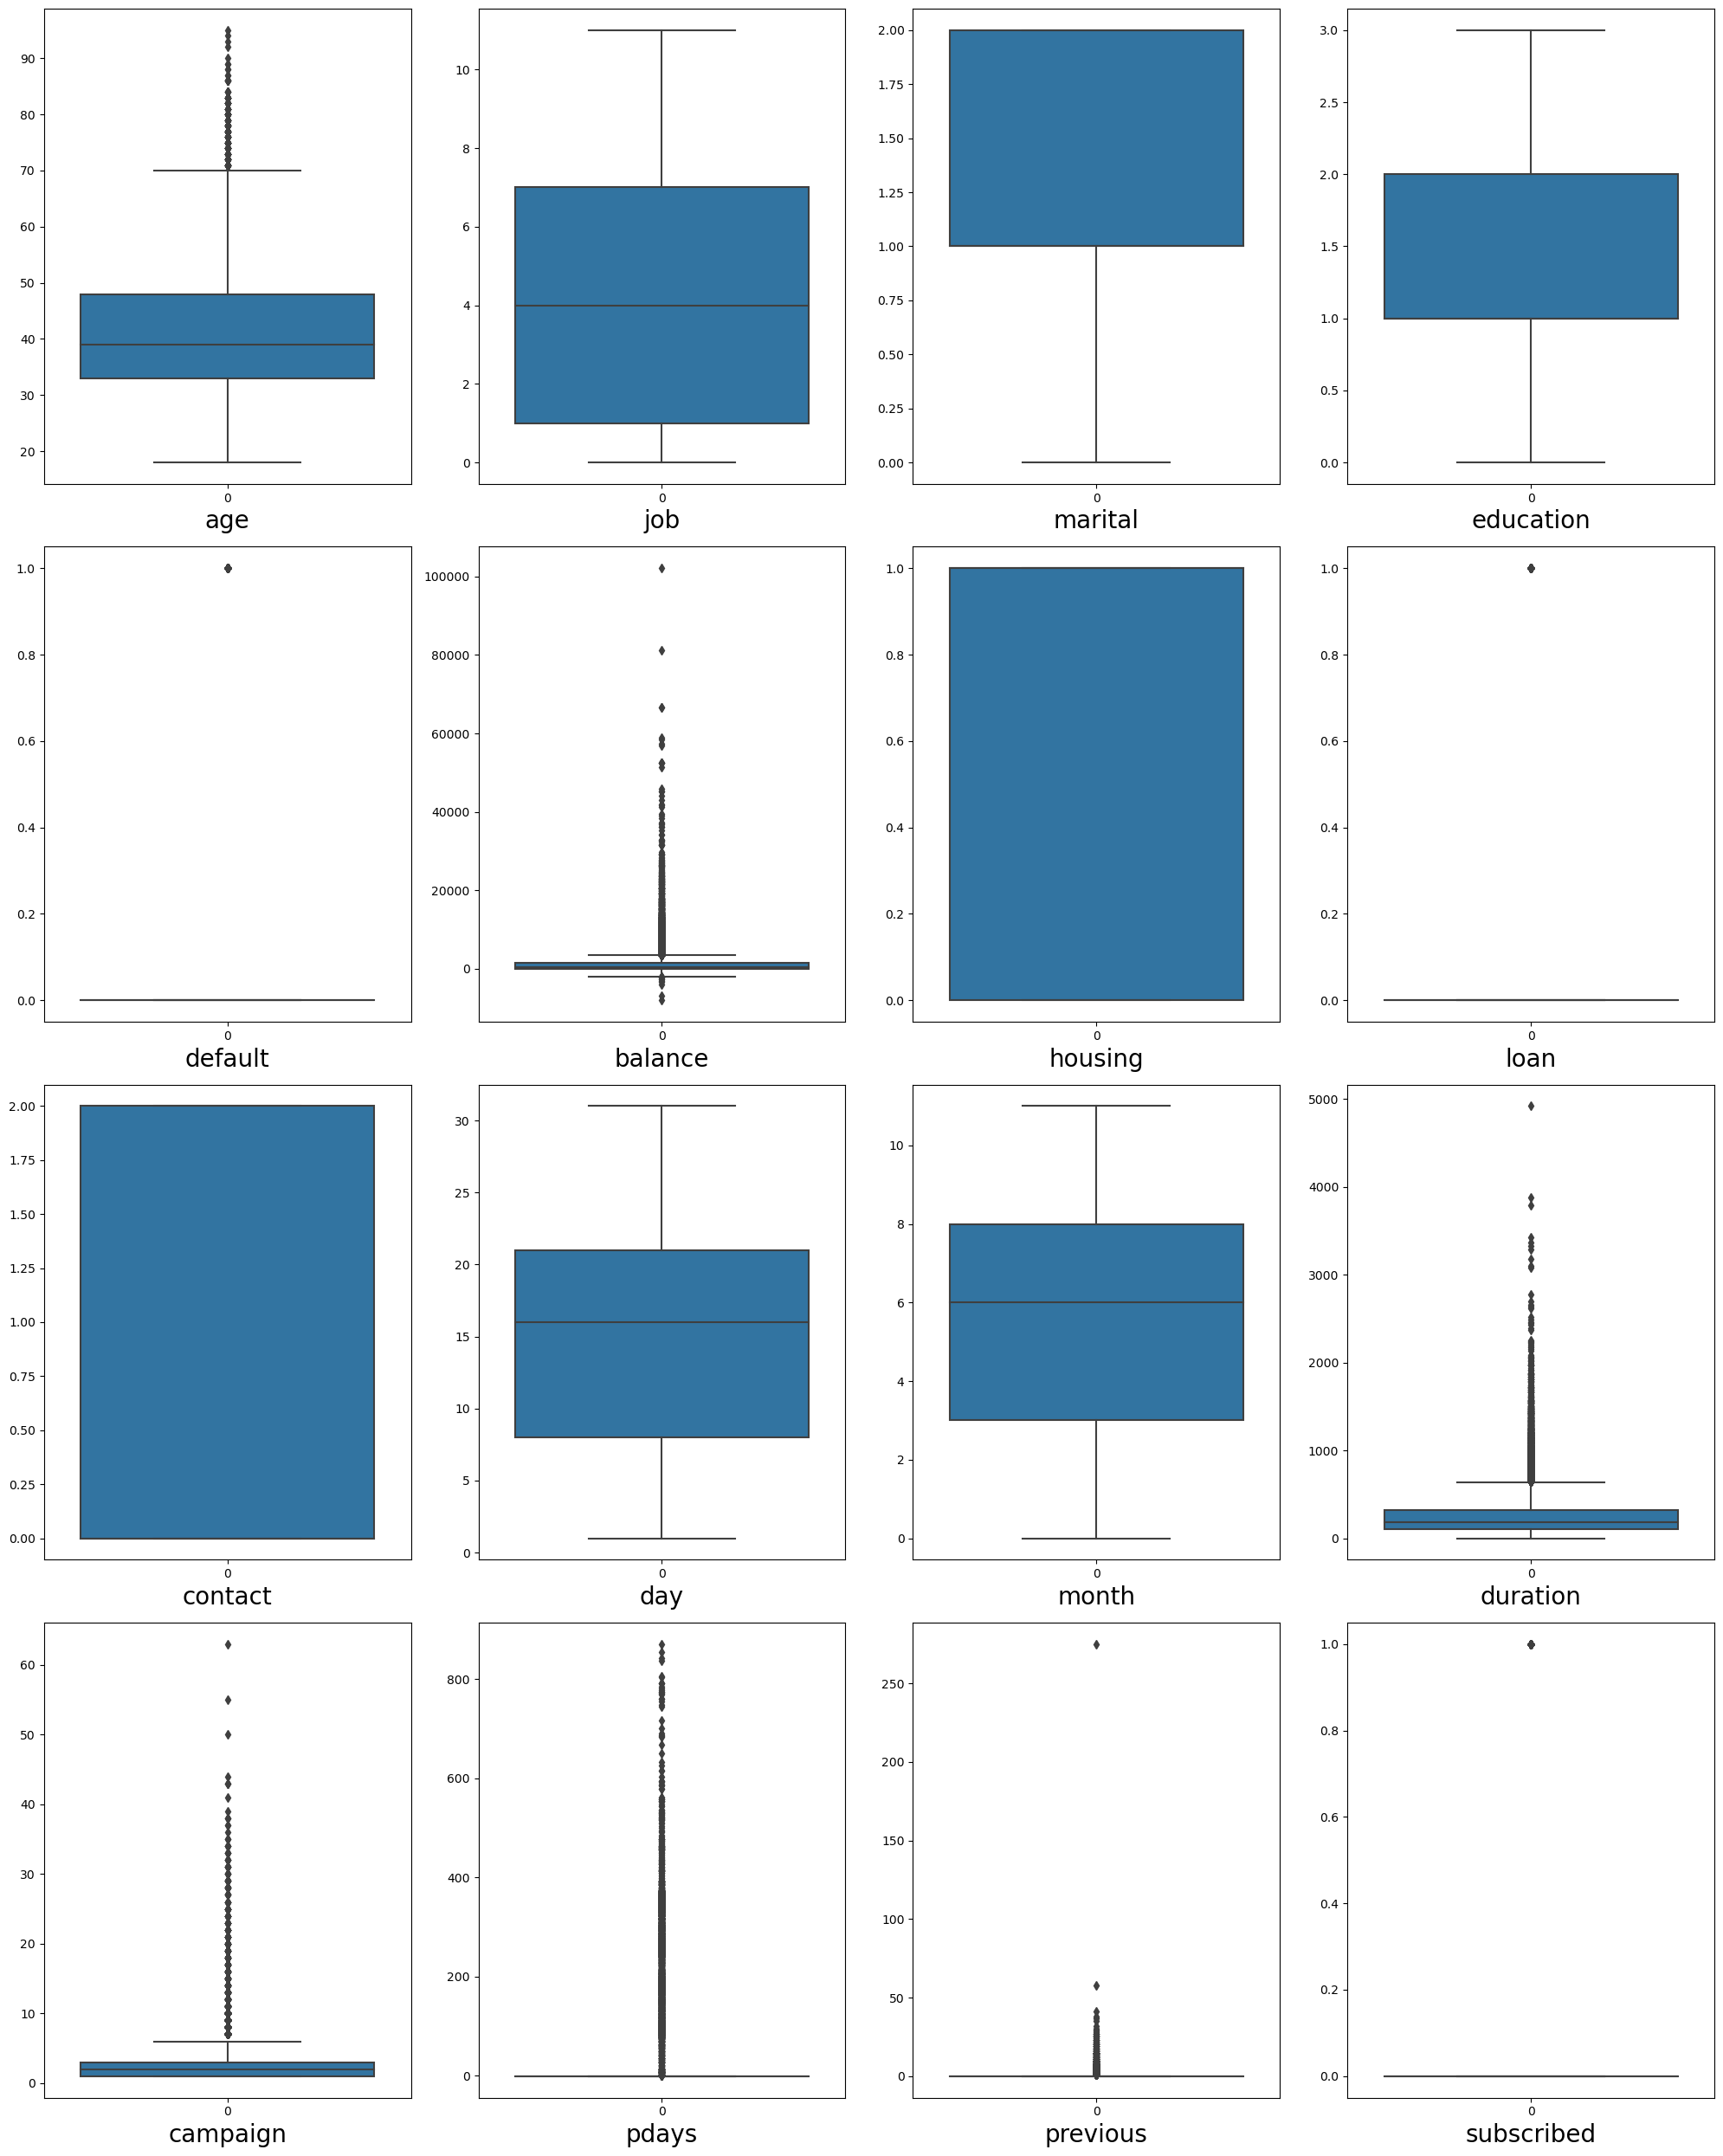

In [70]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data.columns:
    if graph <= 16:
        plt.subplot(4, 4, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


In [71]:
data_copy = data.copy(deep = True)

In [72]:
#Find the IQR to identify outliers

# 1st quantile
q1 = data_copy.quantile(0.25)

#3rd quantile 
q3 = data_copy.quantile(0.75)

#IQR
iqr = q3 - q1

In [73]:
bal_high = (q3['balance'] + (1.5* iqr['balance']))
print(bal_high)

bal_index= np.where(data_copy['balance']> bal_high) 
print (bal_index)

data_copy = data_copy.drop(data_copy.index[bal_index])
print (data_copy.shape ) 

data_copy.reset_index()

3468.0
(array([   17,    18,    25, ..., 31624, 31625, 31637], dtype=int64),)
(28360, 16)


,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,0.0
1,1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,0.0
2,2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,0.0
3,3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,1.0
4,4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28355,31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,0.0
28356,31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,1.0
28357,31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,0.0
28358,31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0


In [74]:
d_high = (q3['duration'] + (1.5* iqr['duration']))
print(d_high)

d_index= np.where(data_copy['duration']> d_high) 
print (d_index)

data_copy = data_copy.drop(data_copy.index[d_index])
print (data_copy.shape ) 

data_copy.reset_index()

640.25
(array([    3,     8,     9, ..., 28344, 28351, 28359], dtype=int64),)
(26371, 16)


,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,0.0
1,1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,0.0
2,2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,0.0
3,4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,0.0
4,5,33,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,2,3.0,116,3,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26366,31641,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,442,2,-1,0,0.0
26367,31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,0.0
26368,31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,1.0
26369,31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,0.0


In [75]:
p_high = (q3['pdays'] + (1.5* iqr['pdays']))
print(p_high)

p_index= np.where(data_copy['pdays']> p_high) 
print (p_index)

data_copy = data_copy.drop(data_copy.index[p_index])
print (data_copy.shape ) 

data_copy.reset_index()

-1.0
(array([   19,    22,    29, ..., 26341, 26352, 26370], dtype=int64),)
(21628, 16)


,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,0.0
1,1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,0.0
2,2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,0.0
3,4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,0.0
4,5,33,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,2,3.0,116,3,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21623,31640,43,4.0,2.0,1.0,0.0,2968,0.0,0.0,2.0,20,6.0,30,4,-1,0,0.0
21624,31641,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,442,2,-1,0,0.0
21625,31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,0.0
21626,31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,1.0


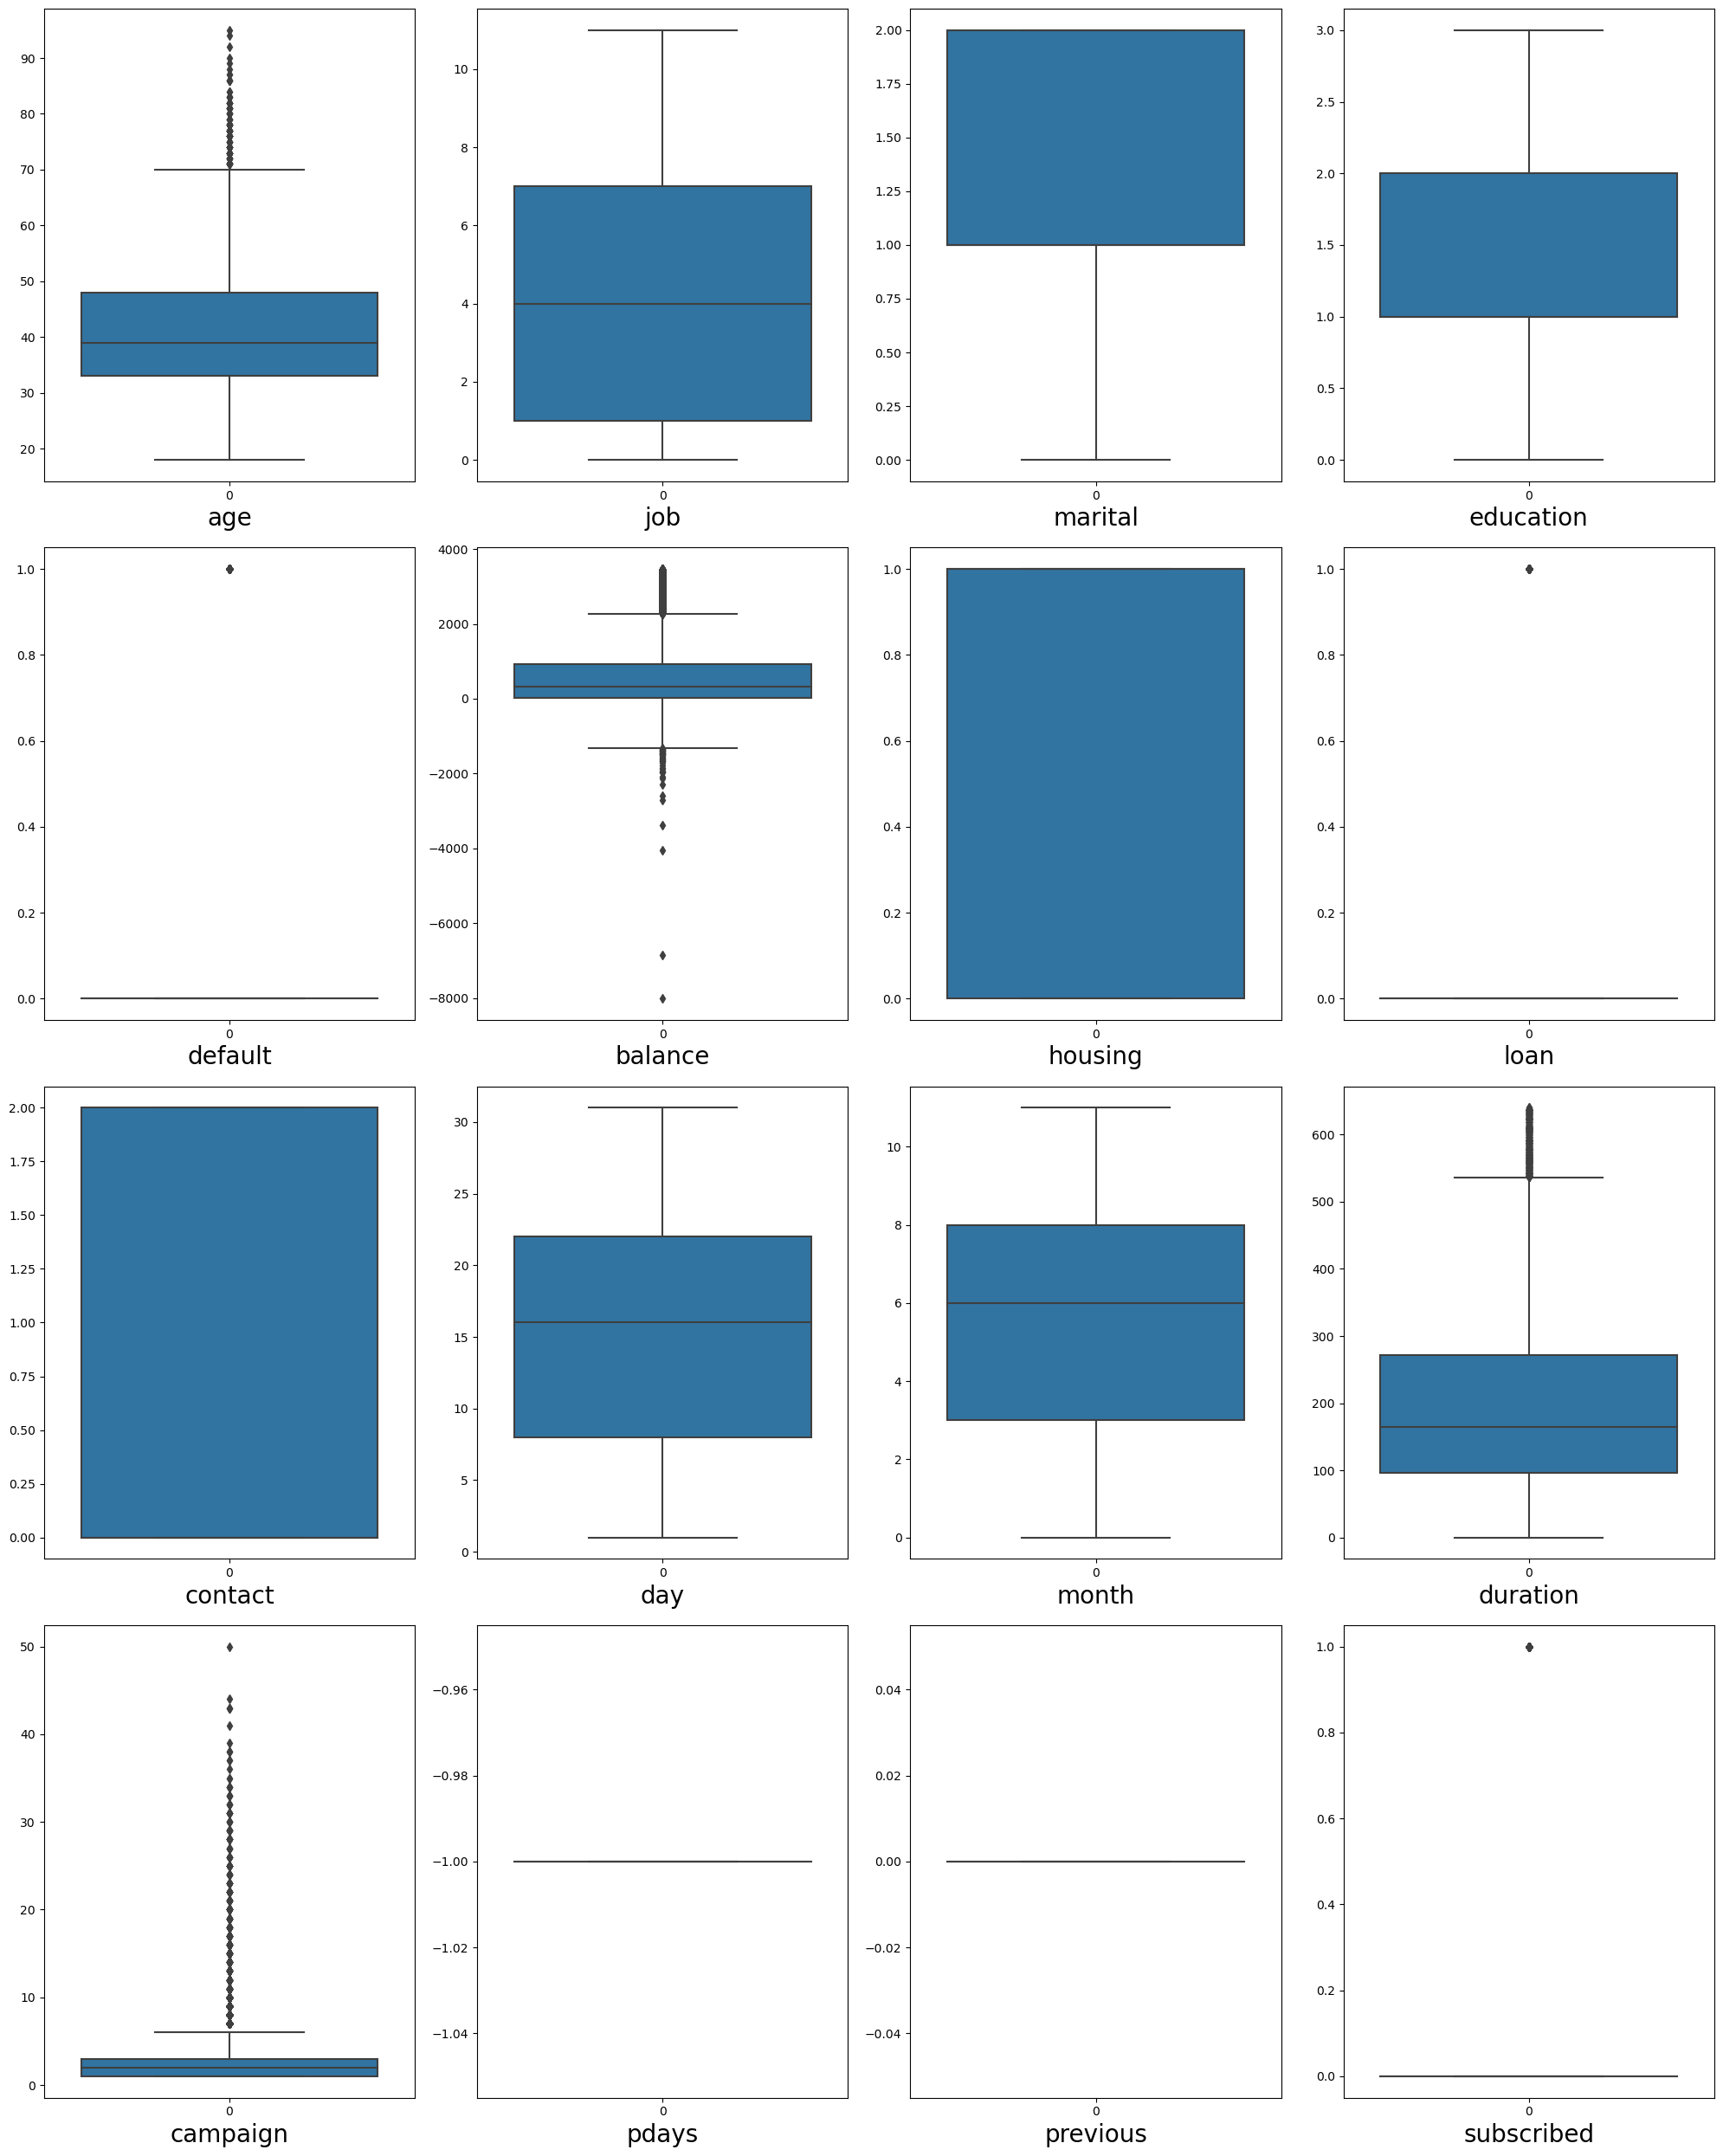

In [76]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy.columns:
    if graph <= 16:
        plt.subplot(4, 4, graph)
        ax = sns.boxplot(data=data_copy[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


In [77]:
data.shape

(31647, 16)

##### There is a lot of data loss due to outliers.

In [78]:
data.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
subscribed     2.377445
dtype: float64

In [79]:
data_copy1 = data.copy(deep = True)

In [80]:
data_copy1['balance'] = np.cbrt(data_copy1['balance'])
data_copy1['duration'] = np.cbrt(data_copy1['duration'])
data_copy1['pdays'] = np.cbrt(data_copy1['pdays'])


In [81]:
data_copy1.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance       -0.086014
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       0.647275
campaign       4.873935
pdays          1.779036
previous      49.302348
subscribed     2.377445
dtype: float64

In [82]:
data_copy2 = data.copy(deep = True)

In [83]:
#For the Box-Cox transformation
data_copy2['balance'] = np.log1p(data_copy2['balance'])
data_copy2['duration'] = np.log1p(data_copy2['duration'])
data_copy2['pdays'] = np.log1p(data_copy2['pdays'])

In [84]:
data_copy2.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance             NaN
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration      -0.438600
campaign       4.873935
pdays               NaN
previous      49.302348
subscribed     2.377445
dtype: float64

In [85]:
data_copy3 =data.copy(deep=True)

In [86]:
data_copy3['balance'] = np.log(data_copy3['balance'])
data_copy3['duration'] = np.log(data_copy3['duration'])
data_copy3['pdays'] = np.log(data_copy3['pdays'])

##### cbrt method is works best

In [87]:
data['balance'] = np.cbrt(data['balance'])
data['duration'] = np.cbrt(data['duration'])
data['pdays'] = np.cbrt(data['pdays'])

In [88]:
## Dividing dependent and independent variable
x = data.drop('subscribed',axis = 1)
y = data['subscribed']


In [89]:
## After dividing variable I scaled independent variable to normalizes the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)


#### variance_inflation_factor

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
## detect the
vif = pd.DataFrame()   

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    

vif

,vif,Features
0,1.284323,age
1,1.050110,job
2,1.225134,marital
3,1.066840,education
4,1.046006,default
5,1.091528,balance
6,1.184021,housing
7,1.030203,loan
8,1.328353,contact
9,1.037743,day


##### There is no multicollinearity issue

In [92]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=2,random_state=155,n_jobs=-1)

x_resampled, y_resampled = smote.fit_resample(x, y)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn=KNeighborsClassifier()

In [96]:
knn.fit(x_resampled,y_resampled)

KNeighborsClassifier()

In [97]:
from sklearn.metrics import accuracy_score,classification_report
def table(clf,x_resampled,y_resampled,train=True):
    if train:
        y_pred=clf.predict(x_resampled)
        print("\n-------------train result------------")
        print(f'Acuraccy Score:{accuracy_score(y_resampled,y_pred)}')
   

In [98]:
table(knn,x_resampled,y_resampled,train=True)


-------------train result------------
Acuraccy Score:0.9383144780180438


In [99]:
import pickle
pickle.dump(knn,open('banking','wb'))

In [100]:
test_data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [101]:
enc_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome']
encoder = OrdinalEncoder()

for column in enc_columns:
    test_data[column] = encoder.fit_transform(test_data[[column]])
    
print(test_data.head())

      ID  age  job  marital  education  default  balance  housing  loan  \
0  38441   32  7.0      1.0        1.0      0.0      118      1.0   0.0   
1  40403   78  5.0      0.0        0.0      0.0     2787      0.0   0.0   
2   3709   31  6.0      2.0        2.0      0.0      144      1.0   0.0   
3  37422   57  7.0      2.0        0.0      0.0     3777      1.0   0.0   
4  12527   45  1.0      0.0        1.0      0.0     -705      0.0   1.0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  
0      0.0   15    8.0        20         6     -1         0       3.0  
1      1.0    1    5.0       372         1     -1         0       3.0  
2      2.0   16    8.0       676         1     -1         0       3.0  
3      1.0   13    8.0        65         2     -1         0       3.0  
4      2.0    3    5.0       111         1     -1         0       3.0  


In [102]:
test=test_data.drop(['ID','poutcome'],axis=1)

In [108]:
test.shape

(13564, 15)

In [109]:
x_resampled.shape

(55864, 15)

In [103]:
std=StandardScaler()

In [104]:
test_scale=std.fit_transform(test)

In [105]:
test_scale

array([[-0.83811435,  0.80755146, -0.2765922 , ...,  1.05870158,
        -0.41819927, -0.2975003 ],
       [ 3.49998693,  0.19676004, -1.91417256, ..., -0.57485034,
        -0.41819927, -0.2975003 ],
       [-0.9324209 ,  0.50215575,  1.36098816, ..., -0.57485034,
        -0.41819927, -0.2975003 ],
       ...,
       [-0.5551947 ,  0.19676004, -0.2765922 , ..., -0.57485034,
        -0.41819927, -0.2975003 ],
       [-1.121034  , -1.33021853,  1.36098816, ..., -0.24813996,
         0.48392585,  1.20391138],
       [-1.121034  , -1.33021853, -0.2765922 , ..., -0.57485034,
         3.14127268,  0.20297026]])

In [106]:
test_scale[5]

array([-0.83811435, -0.10863568,  1.36098816,  1.0408753 , -0.13133597,
       -0.44066584,  0.89303338, -0.42956416, -0.70444373,  0.75548414,
       -0.16575268,  0.76107239, -0.24813996, -0.41819927, -0.2975003 ])

In [111]:
knn.predict([[-0.83811435, -0.10863568,  1.36098816,  1.0408753 , -0.13133597,
       -0.44066584,  0.89303338, -0.42956416, -0.70444373,  0.75548414,
       -0.16575268,  0.76107239, -0.24813996, -0.41819927, -0.2975003]])

array([1.])